In [125]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

###### Importing dataset HousingData.txt

In [126]:
dataset = pd.read_csv("HousingData.txt", names= ["size_sqft","bedrooms","price"], header=None)

In [127]:
dataset.describe()

,size_sqft,bedrooms,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [128]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
size_sqft    47 non-null int64
bedrooms     47 non-null int64
price        47 non-null int64
dtypes: int64(3)
memory usage: 1.2 KB


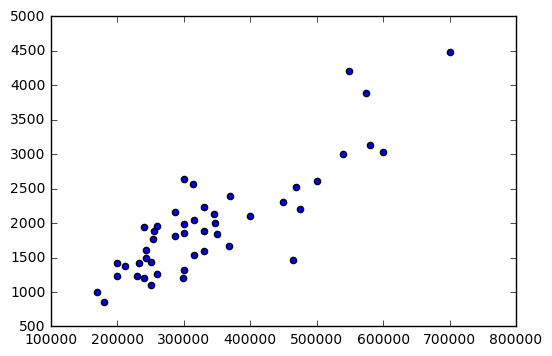

In [129]:
plt.scatter(dataset['price'],dataset['size_sqft'])
plt.show()

In [130]:
np.random.seed(3)
def split_train_test(X, y, test_set_ratio = 0.1):
    shuffled_indices = np.random.permutation(len(X))
    temp = int(test_set_ratio*len(X))
    test_indices = shuffled_indices[:temp]
    train_indices = shuffled_indices[temp:]
    x_train = X.iloc[train_indices]
    y_train = y.iloc[train_indices]
    x_test = X.iloc[test_indices]
    y_test = y.iloc[test_indices]
    return x_train, y_train, x_test, y_test

In [131]:
y = dataset['price']
X = dataset.drop('price', axis=1)
print(X.shape, y.shape)

(47, 2) (47,)


In [132]:
x_train, y_train, x_test, y_test = split_train_test(X,y,test_set_ratio = 0.05)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(45, 2) (45,) (2, 2) (2,)


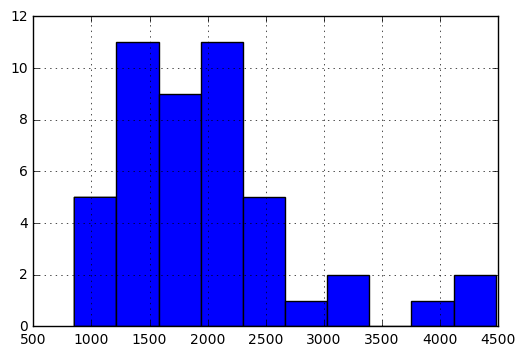

In [133]:
X['size_sqft'].hist()


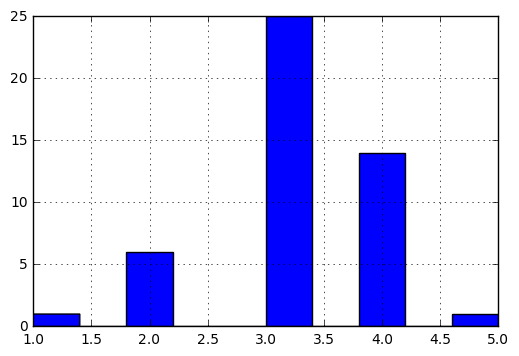

In [134]:
X['bedrooms'].hist()

In [135]:
#normalizing features to mean 0 and std 1
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [136]:
m,f = x_train.shape
y_train = y_train.reshape(1,m)
y_test = y_test.reshape(1,x_test.shape[0])
x_train = x_train.T
x_test = x_test.T

In [137]:
def initialize_parameters(features_count):
    W = np.random.random((1, features_count))
    b = np.random.random((1,1))
    return W,b

In [138]:
def compute_cost(y_hat, y):
    m = y.shape[1]
    cost = (1/m)*np.sum(((y_hat-y)**2))
    return cost

In [139]:
def compute_price(W, b, x):
    price = np.dot(W, x) +b
    return price

In [140]:
def gradients(y_hat, y, x):
    m = y.shape[1]
    temp = y_hat-y
    db = (1/m)*np.sum(temp)
    dW = (1/m)*np.dot(temp, x.T)
    grads={}
    grads['dW'] = dW
    grads['db'] = db
    return grads

In [141]:
#Not used
def update_parameters(W, b, grads, learning_rate=0.01):
    dW = grads['dW']
    db = grads['db']
    W = W - learning_rate*dW
    b = b - learning_rate*db
    return W,b

In [152]:
def complete(x_train, y_train, m, f):
    x = x_train
    y = y_train
    learning_rate = 0.1
    costs= []
    W,b = initialize_parameters(f)
    dWv = np.zeros(W.shape)
    dbv = np.zeros(b.shape)
    for i in range(1,100):
        y_hat = compute_price(W, b, x)
        cost = compute_cost(y_hat, y)
        costs.append(cost)
        print("Iteration number is "+str(i)+" Cost is "+str(cost))
        grads = gradients(y_hat, y, x)
        dW = grads['dW']
        db = grads['db']
        #Momentum update
        dWv = 0.9*dWv + 0.1*dW
        dbv = 0.9*dbv + 0.1*db
        W = W - learning_rate*dWv
        b = b - learning_rate*db
    return W,b,costs
    

In [153]:
W,b,costs = complete(x_train, y_train, m, f)

Iteration number is 1 Cost is 134905730466.0
Iteration number is 2 Cost is 111892360517.0
Iteration number is 3 Cost is 92973033847.8
Iteration number is 4 Cost is 77374660883.6
Iteration number is 5 Cost is 64482793246.2
Iteration number is 6 Cost is 53808454035.4
Iteration number is 7 Cost is 44961339814.4
Iteration number is 8 Cost is 37628341352.7
Iteration number is 9 Cost is 31556487074.6
Iteration number is 10 Cost is 26539541831.4
Iteration number is 11 Cost is 22407601526.8
Iteration number is 12 Cost is 19019116715.5
Iteration number is 13 Cost is 16254859389.2
Iteration number is 14 Cost is 14013419319.6
Iteration number is 15 Cost is 12207881195.7
Iteration number is 16 Cost is 10763392317.9
Iteration number is 17 Cost is 9615383314.25
Iteration number is 18 Cost is 8708251469.9
Iteration number is 19 Cost is 7994357896.63
Iteration number is 20 Cost is 7433225993.83
Iteration number is 21 Cost is 6990859546.93
Iteration number is 22 Cost is 6639124542.64
Iteration number i

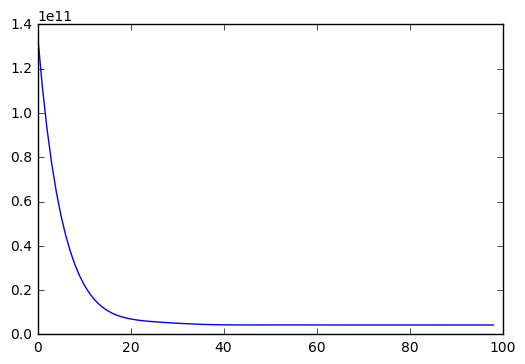

In [157]:
costs = np.squeeze(costs)
plt.plot(costs)
plt.show()